In [1]:
#IMPORTS
########
import pandas as pd
import numpy as np
import mysql.connector
import tpclean.tpclean as tp

#custom imports
from Scripts.config import role, bucket_name, prefix, bucket_path, sub_path
from Scripts.nlp_functions import generate_wordcloud , get_summary

#establish connection
from Scripts.config import host, db
from Private.private import user , password

#NLTK
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

#Imports for Bigrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from Scripts.nlp_functions import bigram_to_single_word
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#API Imports
from Private.private import aylien_app_id,aylien_API_KEY

print("========SETUP========")
#load credentials
conn_kwargs = {"host":host, 
               "user":user, 
               "password":password}
conn = tp.sql_connect(db,db_type="mysql",**conn_kwargs)
#conn = mysql.connector.Connect(database = db, **conn_kwargs)
c = conn.cursor()

========SETUP========
Connecting to mysql
successfully imported module
Connection to mysql successfull. with curser MySQLCursor: (Nothing executed yet)


In [2]:
class File:
    def __init__(self,name):
        self.filename = name

In [3]:
file = File("YB_1_ban-video-games_pro.wav")

In [4]:
c.execute(f"""	SELECT full_text , bigram_cloud_url , audio_path 
						FROM conversations
						WHERE filename = '{file.filename}'""")
output = c.fetchall()

In [5]:
transcription , image , audio_file = output[0]

In [6]:
transcription

"when a 10 year old child plays without any supervision in a game where he needs to run down old people and beat women up in order to score points. There is something seriously wrong and even dangerous about this. I'm going to have two points. Is prime minister first. What things are we allowed to ban in general? And secondly, the dangers, the dangerous effects of violent video games, specifically first point. So allegedly we're talking about a private product that doesn't directly harm anyone. Why are we justified in banning it? Thing is, as soon as we have good reason to believe that a certain product holds a dangerous effect for society, we are very much legitimate in either limiting it, as we do with alcohol, where we don't allow the sale of alcohol to certain age groups or in certain places, or in certain hours were even banning it all together like we do with drugs. It is not only our responsibility as a government to retroactively punish someone after doing something wrong, but 

In [9]:
text = """we need to abolish the monarchy before we begin. We need to clarify something because there are many different mothers and types of monarchies in the world, starting from models where the monarch is the fact of ruler with absolute authority on all the political decisions being made like in Saudi Arabia are cutter two models where the monarch is more of a diplomatic symbolic figure with hardly any authority when it comes to policy, like in Great Britain for the purposes off this debate, all of these models, we will argue, need to give way in favor off a democratic republic. Of course, the more authorities that the morning calls, the bigger our problem becomes will have two points in the debate. First, we're going to explain the rationale of why we had monarchs to begin with and why this rationale is no longer valid Today and the second point in the second point, we will discuss the harms of a monarchy on under all models. So first point, it used to be that monarchs all had absolute authorities, and the legitimacy for the rule was that they managed to persuade the people that they had a divine right to rule. The royal families were nearly godlike, and this is why the title passes on is Hair Editori and passes on from father to child. Um, now the rationale behind it, as put forth by political philosopher Thomas hopes, was that we needed someone that one ruler above everyone else in order for there to be order in the street. Otherwise we would have anarchy if no one was there to give out rules and enforce them and punish someone. If he harmed me, then everyone would do as he pleases. And this is bad for everyone. Therefore, it's best to just sacrifice some of our liberties to a single ruler that will create order in the streets. But as time went by and the more the citizens became aware of their own rights and started demanding things from their kings, authorities of the of the Monarchs dwindle down and brought us to the development off democratic republics. And now there are plenty of examples of states that have no king. But there is still not in anarchy in the streets, and all that is needed in order for that to happen is a functioning government parliaments that makes laws and the courts to to enforce them. This thus the old logic and rationale behind having a monarch is no longer valid today. The new rational given sometimes, especially in Great Britain, is that we're talking about an institution that is ingrained in the tradition of the people and in their culture and history, and all of that is very true. But nostalgia and romanticism can only get you so far. This is exactly what museums air for. We're not saying that we should just forget all about our history. But just like Viking, culture is a very important part of the Nordic countries history. This does not mean that they should go out and ravage the seas. Today. We should put that behind if we don't have a stronger logic behind that. Now, the monarchy comes at a very high price and we need to consider whether it is worth it just in favor off nostalgia. This brings me to my second point where I will discuss the harms of the monarchy. Along the years, there have been good kings and there have been bad kings. But the biggest problem is that the people have no control over what their king does, except maybe for violent revolutions when they try to remove the king. And this is, of course, something that we would like to prevent in the future. Now, because the title passes on through heritage, since the King needn't worry about his seat and can pretty much do whatever he pleases, even if it comes at the expense off his citizens in absolute monarchies models. This is true to this very day. On top of that, having grown up in the palace his entire life. Even if the king wishes to do well most for the times, he is not fully aware and isn't really connected to the average citizens that he rules over and doesn't know what they need. Um, now, this is the first problem that democracy has come to fix even elected governments. Of course, there are good governments in bad governments. But the head of state always knows that if he's not doing a good job and he's not pleasing its people, then he will be removed from office, and this is the biggest check and balance on the power off the government. That's important. But even in constitutional monarchies, where the King is not a political leader like in three u. K. There still is a very high price to pay for monarchy. Firstly, money, it costs a lot of money to maintain Buckingham Palace or the lavish lifestyles of the royal family. Of course, there's also security costs and costs off expeditions abroad and all of these things. Now this all comes from the taxpayers payroll, and this is the taxpayer that did not elect this monarch. To begin with. This is not legitimate, more over. There is something wrong about still having a class citizens like royal families. This fixates the class system of old age, and we think that all of these all of these reasons are more than enough to abolish all models of monarchies.""".split(" ")

In [10]:
file = "testi"

In [11]:
## CREATE BIGRAMS
finder = BigramCollocationFinder.from_words(text)
finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)
bigrams_fd = finder.ngram_fd

#visualize in a wordcloud
testfd = bigram_to_single_word(bigrams_fd)

Generating wordcloud


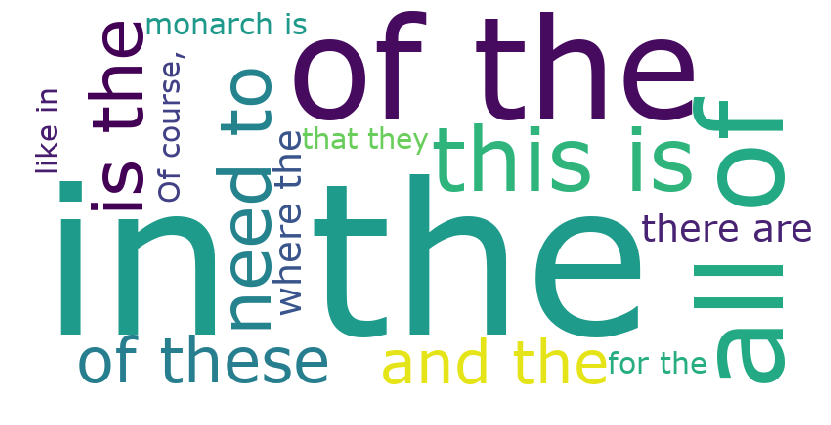

In [12]:
wordcloud_url = generate_wordcloud(testfd, file)
c.execute(f"""UPDATE conversations
                 SET bigram_cloud_url = "{wordcloud_url}"
                 WHERE filename = "{file}"
                 """)


In [13]:
conn.close()

In [15]:
import wordcloud

In [16]:
help(wordcloud.WordCloud())

Help on WordCloud in module wordcloud.wordcloud object:

class WordCloud(builtins.object)
 |  WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False)
 |  
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (default=200)
 |      Height of the canvas.
 |  
 |  prefer_horizontal : f

In [18]:
!ls Flask

DroidSansMono.ttf Upload Test.ipynb helpers.py        templates
Private           __pycache__       log.txt
Untitled.ipynb    flask_webhook.py  static


In [20]:
cloud = wordcloud.WordCloud(font_path = "Flask/DroidSansMono.ttf").generate_from_frequencies(testfd)

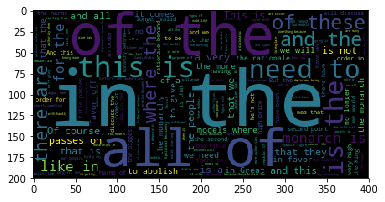

In [24]:
import matplotlib.pyplot as plt
plt.imshow(cloud)